<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_teor%C3%ADa_09_Multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/09 - Multi layer perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron multicapa

![imagen](https://i.ytimg.com/vi/Fz4Uo8_uUfg/hqdefault.jpg)

Los perceptrones multicapa posee como mínimo tres capas de neuronas:
* La capa de entrada (la cantidad de neuronas dependerá de las variables de entrada)
* Capa de salida (la cantidad de neuronas dependerá de la cantidad de salidas que vayamos a tener)
* Capas ocultas: En las capas ocultas se realiza todo el procesamiento. A medida que agregamos más capas ocultas, la complejidad de la red aumenta.

Si un perceptrón posee una única capa oculta, se llamará _shallow neural network_ (red neuronal poco profunda)
Si un perceptrón posee más de una capa oculta se llamará _deep neural networks_ (redes neuronales profundas)

Cada neurona poseerá un peso. Por tal motivo, las operaciones matemáticas que se generarán en la red será multiplicaciones matriciales.

Para poder trabajar con un perceptron multicapa se debe definir lo siguiente:
* Cantidad de capas ocultas
* Cantidad de neuronas por capa oculta
* Función de activación
* Función de pérdida
* Algoritmo de backpropagation

No siempre es mejor usar una red compleja. En general mientras más compleja sea la red, más tiempo tardará el proceso de entrenamiento y pueden surgir problemas de overfitting. Por otro lado, mientras menos compleja es una red menos capacidad tendrá de distinguir relaciones no lineales entre las entradas y las salidas.


Una función de activación puede ser la **sigmoide**
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

Otra función puede ser la función **ReLu** (Rectified Linear Units). Cualquier valor menor a 0 la función lo convierte en 0, sino el valor de entrada es el valor de salida.

$$f(X) = max(0,X)$$

In [ ]:
import os
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier



#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


In [ ]:
data = pd.read_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";")

In [ ]:
#estandarizamos el dataset y lo convertimos en numpy array para usarlo en el modelo.
X = data.drop(columns = ["index", "Survived"])
y = data.Survived
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.values.astype(np.float32, order="C") #.value convierte el dataframe en vectores de numpy; astype convierte el dato en float32 y order=c quiere decir C-style o Row-based contiguous array, es un tipo de layout de memoria de numpy que significa que las operaciones por fila son mas rapidas q por columnas (order = f)
X_test = X_test.values.astype(np.float32, order="C")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#estandarizo los datos. z = (x - u) / s
X_test = scaler.fit_transform(X_test)

Y_train = Y_train.values
Y_test = Y_test.values

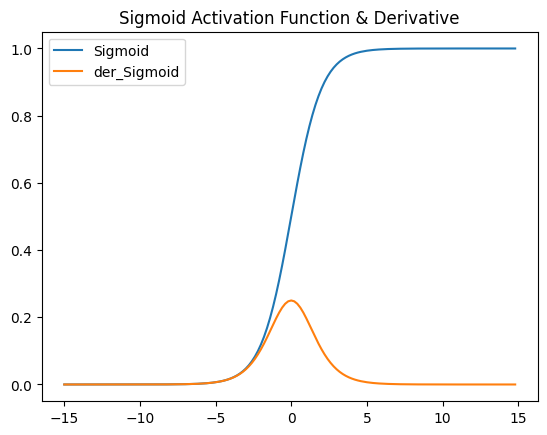

In [ ]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

# Derivative of Sigmoid
def der_sigmoid(x):
  return sigmoid(x) * (1- sigmoid(x))

x = np.arange(-15.0, 15.0, 0.2)
y = sigmoid(x)
dy = der_sigmoid(x)
plt.plot(x,y,x,dy)
plt.title('Sigmoid Activation Function & Derivative')
plt.legend(['Sigmoid','der_Sigmoid'])
plt.show()

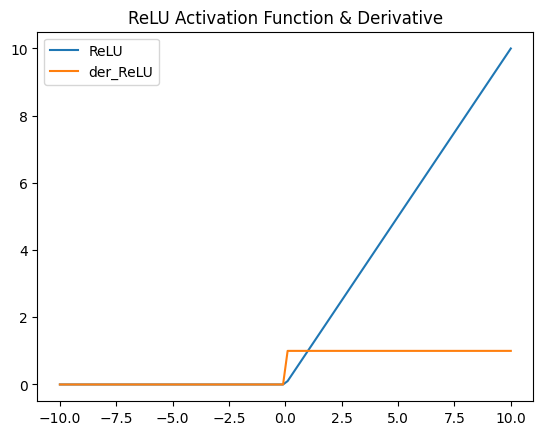

In [ ]:
# Rectified Linear Unit (ReLU)
def ReLU(x):
  data = [max(0,value) for value in x]
  return np.array(data, dtype=float)

# Derivative for ReLU
def der_ReLU(x):
  data = [1 if value>0 else 0 for value in x]
  return np.array(data, dtype=float)

# Generating data for Graph
x_data = np.linspace(-10,10,100)
y_data = ReLU(x_data)
dy_data = der_ReLU(x_data)

# Graph
plt.plot(x_data, y_data, x_data, dy_data)
plt.title('ReLU Activation Function & Derivative')
plt.legend(['ReLU','der_ReLU'])
#plt.grid()
plt.show()

### Modelo hecho a mano

In [ ]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np

    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))

    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np

    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)

    return f

In [ ]:
X_train.shape[0]

596

In [ ]:
X_train.shape[1]

10

In [ ]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate (η)
eta =  1/623


# 0: Random initialize the relevant data
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5  # Layer 1 np.random.rand es una funcion de numpy que crea vectores con numeros aleatorios entre 0 y 1.  En este caso, crea una matriz de 4x10.
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2  Se multiplica por 2 para que el valor este entre -0.5 y 1.5
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = [] #loss function for the passenger
vec_y = [] #vector donde se va a depositar el valor del output

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers entre 0 y 596

    # 1: input the data
    x = X_train[I]


    # 2: Start the algorithm

    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 np.dot realiza la multiplicacion entre 2 matrices
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer

    #2.2: Compute the output layer's error
    delta_Out = 2*(y-Y_train[I]) * sigmoid_act(y, der=True)

    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error

    # 3: Gradient descent
    wOut = wOut - eta*delta_Out*z2  # Output Layer
    bOut = bOut - eta*delta_Out

    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2 np.kron es una multiplicacion kronecker entre dos matrices. matriz a de m*n y matriz b de p*q, se forma una matriz de mp*nq
    b2 = b2 - eta*delta_2

    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1

    # 4. Computation of the loss function
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


In [ ]:
len(vec_y)

596

In [ ]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015): #Artificial Neural Network. Defino la funcion para las bases de entrenamiento

    # 0: Random initialize the relevant data
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:

        # 1: input the data
        x = X_train[I]

        # 2: Start the algorithm

        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer

        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)

        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error

        # 3: Gradient descent
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out

        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2

        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1

        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)

    #calculo la perdida promedio por batch.  divido los outputs en 9 batches de 60 cada uno, sumo el output de la loss function y lo divido por 60.
    batch_loss = []
    for i in range(0, 9):
        loss_avg = 0
        for m in range(0, 59):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)


    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Average Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()

    return w1, b1, w2, b2, wOut, bOut, mu

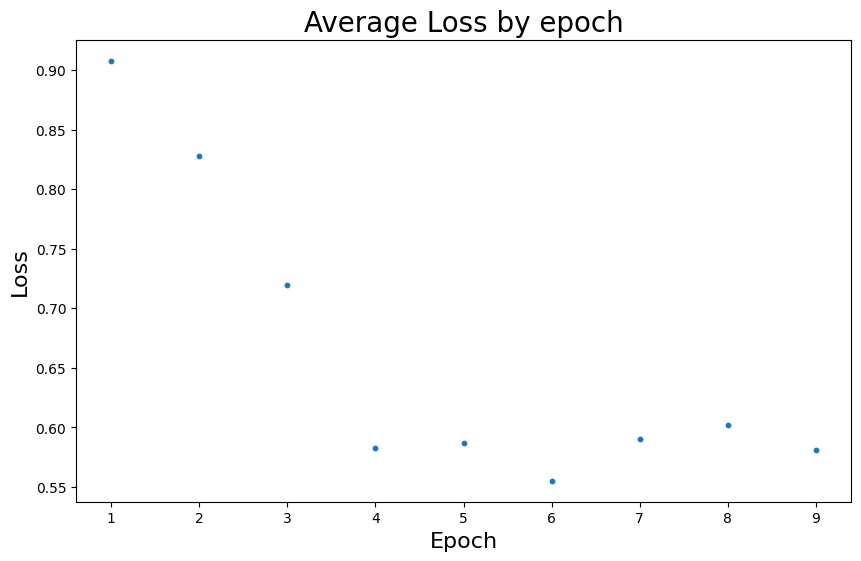

In [ ]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)


In [ ]:
#aplico los parametros entrenados a la base de test.
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np

    pred = []

    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data
        x = X_test[I]

        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

        # Append the prediction;
        # We now need a binary classifier; we apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )


    return np.array(pred)

In [ ]:
#en vez de arrojar la prediccion binaria, calcula la probabilidad

def ANN_pred_proba(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np

    pred = []

    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data
        x = X_test[I]

        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

        pred.append(y)


    return np.array(pred)

In [ ]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)
preds = ANN_pred_proba(X_test, w1, b1, w2, b2, wOut, bOut, mu)

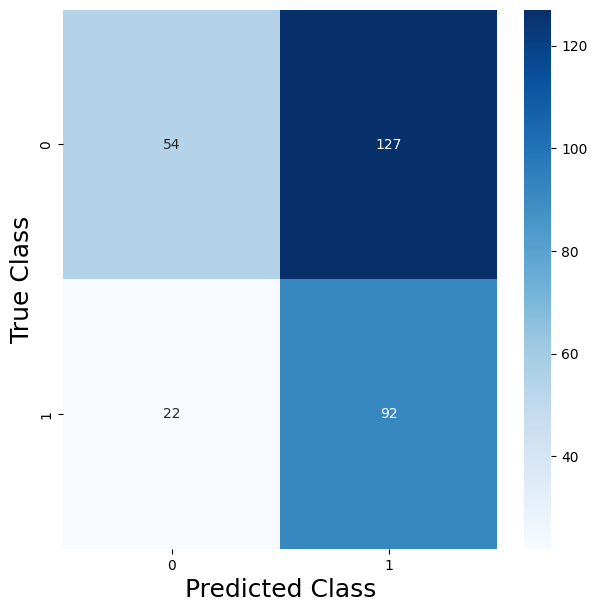

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)

plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

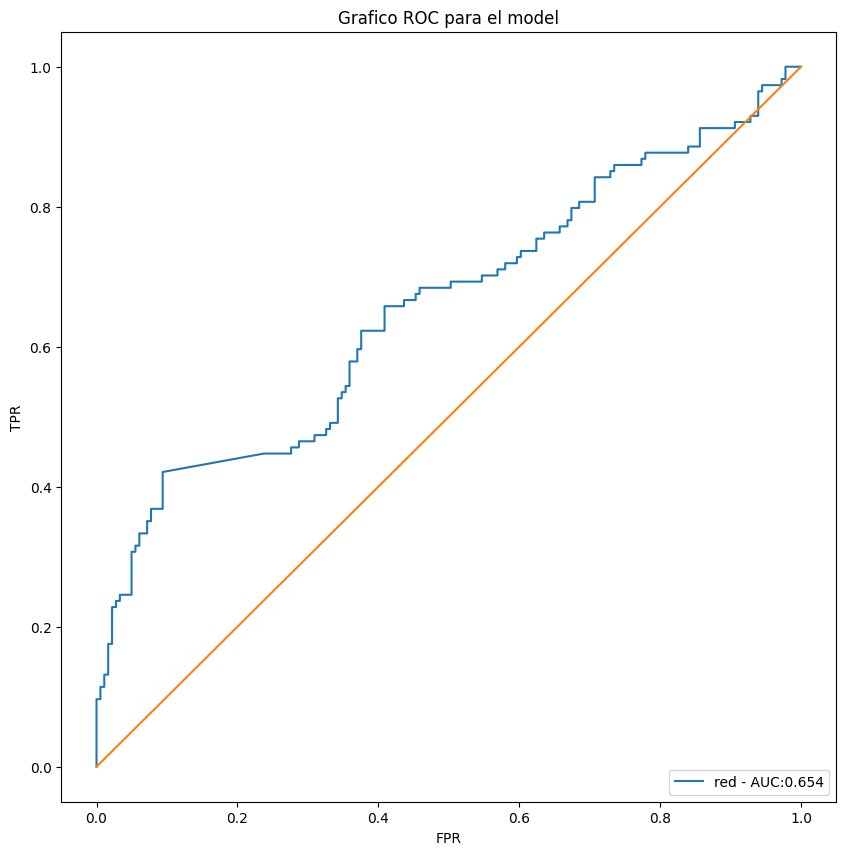

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el model")


areaBajoCurva = roc_auc_score(Y_test, preds)
fpr, tpr, _ = roc_curve(Y_test, preds)
plt.plot(fpr, tpr, label="{} - AUC:{}".format("red", round(areaBajoCurva,4)))


plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Modelo en scikit-learn

Vamos a crear un modelo un poco más complejo ya que agregaremos dos capas ocultas (Trabajaremos con deep learning)

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(16,12), max_iter=300,activation = 'relu',solver='adam',random_state=1) #adam es un optimizador que define learning rate
classifier.fit(X_train, Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 12), max_iter=300, random_state=1)

In [ ]:
y_pred = classifier.predict(X_test)
y_probas = classifier.predict_proba(X_test)[:,-1]


In [ ]:
accuracy_score(Y_test, y_pred)

0.8101694915254237

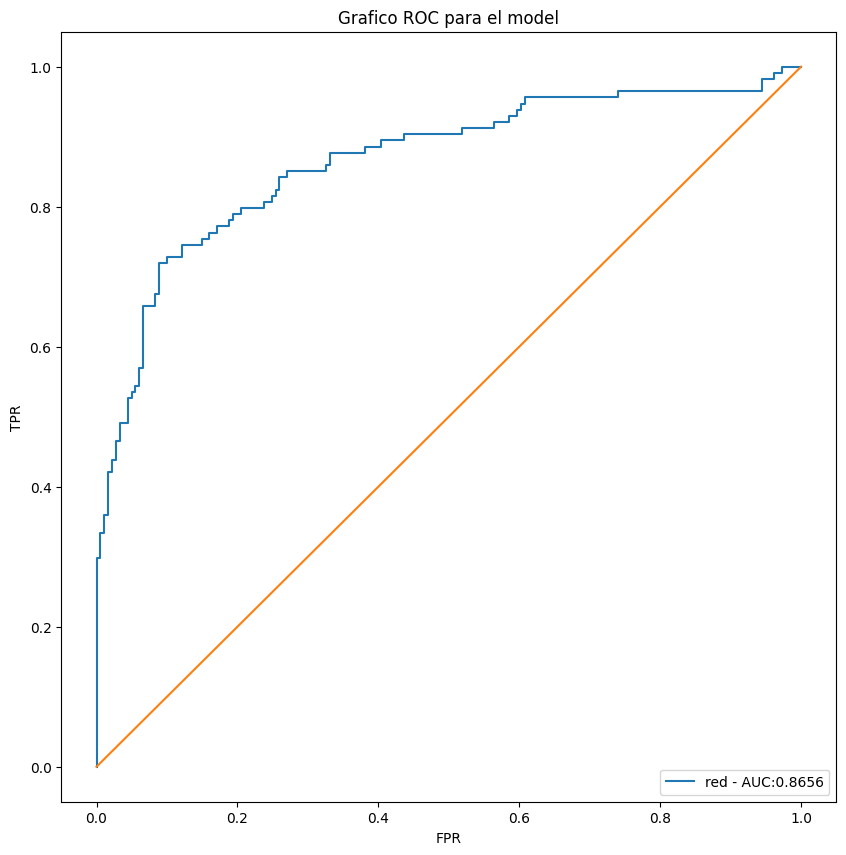

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el model")


areaBajoCurva = roc_auc_score(Y_test, y_probas)
fpr, tpr, _ = roc_curve(Y_test, y_probas)
plt.plot(fpr, tpr, label="{} - AUC:{}".format("red", round(areaBajoCurva,4)))


plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Modelo en Keras

Keras es una API de redes neuronales de deep learning.  Es una biblioteca de código abierto que se ejecuta sobre frameworks como Theano y TensorFlow

In [ ]:
#Dependencies.
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu')) #capa de entrada con 10 perceptrones, la primera capa oculta tiene 16.
model.add(Dense(12, activation='relu')) #la segunda capa oculta tiene 12
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC']) #compile especifica el proceso de aprendizaje de una red.

In [ ]:
history = model.fit(X_train, Y_train, epochs=100) #training performance of the model


Epoch 1/100
19/19 [==============================] - 1s 6ms/step - loss: 0.7147 - auc: 0.4529
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6605 - auc: 0.6247
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6204 - auc: 0.7427
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5873 - auc: 0.7991
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5572 - auc: 0.8222
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5309 - auc: 0.8350
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5089 - auc: 0.8435
Epoch 8/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4916 - auc: 0.8486
Epoch 9/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4792 - auc: 0.8503
Epoch 10/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4697 - auc: 0.8531
Epoch 11/100
19/19 [==============================] - 0s 3m

In [ ]:
y_pred = model.predict(X_test)


10/10 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_pred > 0.5,Y_test)
print('Accuracy is:', a*100)

Accuracy is: 81.01694915254237


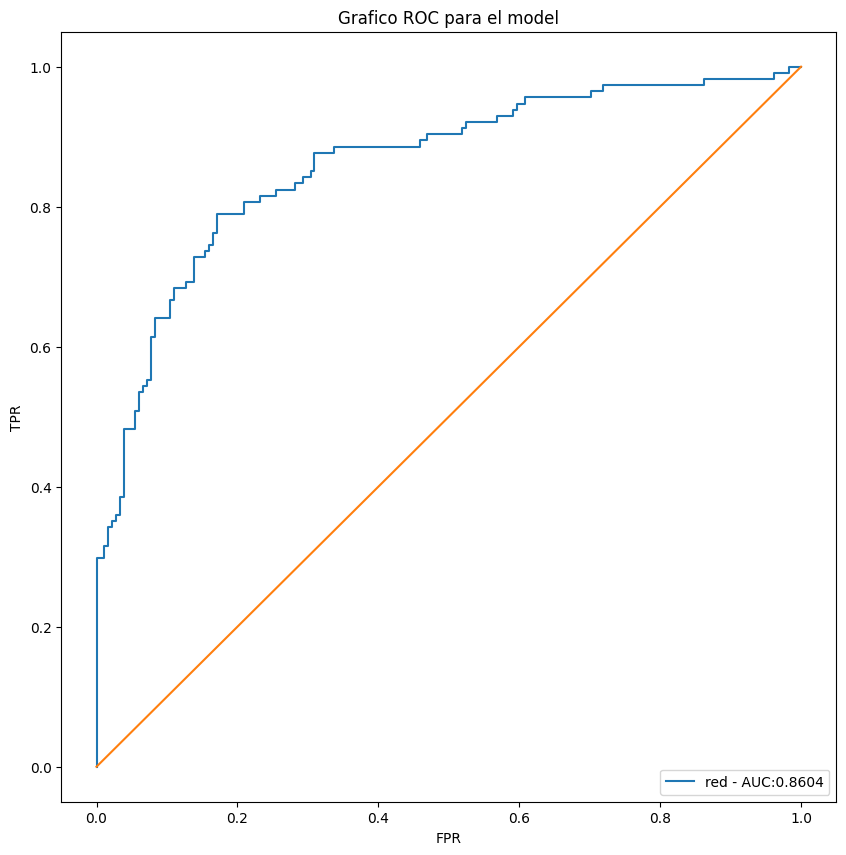

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el model")


areaBajoCurva = roc_auc_score(Y_test, y_pred)
fpr, tpr, _ = roc_curve(Y_test, y_pred)
plt.plot(fpr, tpr, label="{} - AUC:{}".format("red", round(areaBajoCurva,4)))


plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100)

Epoch 1/100
19/19 [==============================] - 0s 18ms/step - loss: 0.3531 - auc: 0.9119 - val_loss: 0.4458 - val_auc: 0.8601
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3527 - auc: 0.9121 - val_loss: 0.4471 - val_auc: 0.8604
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3514 - auc: 0.9134 - val_loss: 0.4467 - val_auc: 0.8609
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3514 - auc: 0.9127 - val_loss: 0.4469 - val_auc: 0.8612
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3503 - auc: 0.9132 - val_loss: 0.4461 - val_auc: 0.8610
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3499 - auc: 0.9141 - val_loss: 0.4479 - val_auc: 0.8603
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3508 - auc: 0.9133 - val_loss: 0.4485 - val_auc: 0.8592
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.3487 - 

In [ ]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

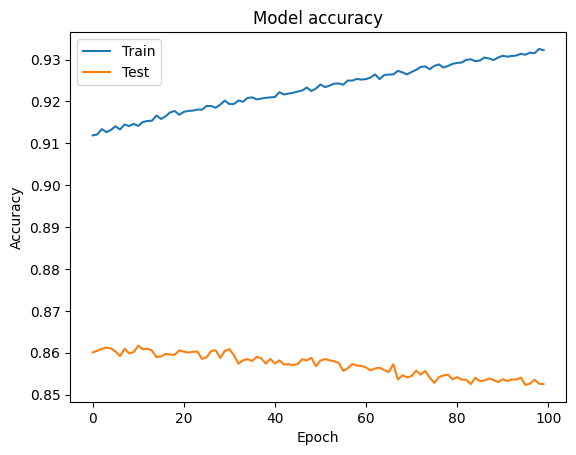

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

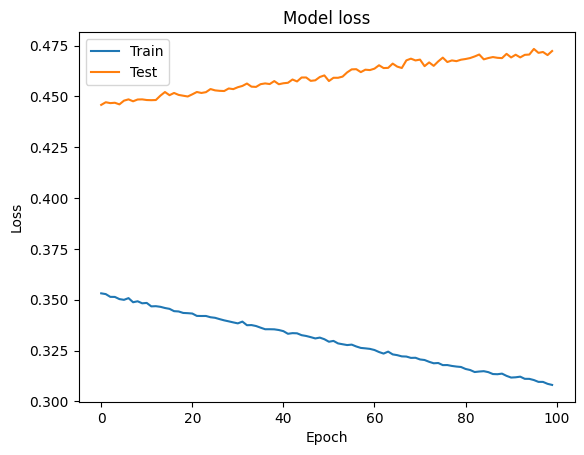

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()